### This is a sample Amazon sales dataset took from Kaggle, going to clean the dataset and visualize it for Analysis

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MilanvictorV/MyDataScienceProjects/main/Data_Analysis_projects/Amazon_Sales/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
df.shape

(1465, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

#### Only 2 Nan values in Rating column so filling those 2 Nan values with a Minimum amount of Rating count as 5000

In [6]:
df['rating_count'].fillna('5,000', inplace = True)
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

#### Img_link, product_link, user_id, about_product, user_name, review_id and review_content columns are not required so dropping those columns

In [7]:
df.drop(columns = ['product_link','img_link','review_content','review_title','review_id','user_name','about_product','user_id','product_id'] , inplace = True)
df.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269"
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994"
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928"
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363"
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905"


In [8]:
df['brand'] = df['product_name'].apply(lambda x : x.split()[0])
df.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",Wayona
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994",Ambrane
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",Sounce
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",boAt
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",Portronics


In [9]:
# We can't extract the product from this column, so dropping it
df.drop(columns = 'product_name', inplace = True)
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",Wayona
1,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994",Ambrane
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",Sounce
3,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",boAt
4,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",Portronics


#### Changing the discounted_price, actual_price, discount_percentage to Numeric value

In [10]:
df['discounted_price'] = df['discounted_price'].str[1:]
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Computers&Accessories|Accessories&Peripherals|...,399,"₹1,099",64%,4.2,"24,269",Wayona
1,Computers&Accessories|Accessories&Peripherals|...,199,₹349,43%,4.0,"43,994",Ambrane
2,Computers&Accessories|Accessories&Peripherals|...,199,"₹1,899",90%,3.9,"7,928",Sounce
3,Computers&Accessories|Accessories&Peripherals|...,329,₹699,53%,4.2,"94,363",boAt
4,Computers&Accessories|Accessories&Peripherals|...,154,₹399,61%,4.2,"16,905",Portronics


In [11]:
def numeric_convert(price):
    temp_list = price.split(',')
    finalstring = ''.join(temp_list)
    return float(finalstring)

In [12]:
df['discounted_price'] = df['discounted_price'].apply(lambda x : numeric_convert(x))
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Computers&Accessories|Accessories&Peripherals|...,399.0,"₹1,099",64%,4.2,"24,269",Wayona
1,Computers&Accessories|Accessories&Peripherals|...,199.0,₹349,43%,4.0,"43,994",Ambrane
2,Computers&Accessories|Accessories&Peripherals|...,199.0,"₹1,899",90%,3.9,"7,928",Sounce
3,Computers&Accessories|Accessories&Peripherals|...,329.0,₹699,53%,4.2,"94,363",boAt
4,Computers&Accessories|Accessories&Peripherals|...,154.0,₹399,61%,4.2,"16,905",Portronics


In [13]:
df['actual_price'] = df['actual_price'].str[1:]
df['actual_price'] = df['actual_price'].apply(lambda x : numeric_convert(x))
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269",Wayona
1,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994",Ambrane
2,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,"7,928",Sounce
3,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,"94,363",boAt
4,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,"16,905",Portronics


In [14]:
df['discount_percentage'] = df['discount_percentage'].str[:-1]
df['discount_percentage'] = df['discount_percentage'].apply(lambda x : numeric_convert(x))
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",Wayona
1,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994",Ambrane
2,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",Sounce
3,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",boAt
4,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",Portronics


#### There are so many categories for single product, to get one value taking the first from category

In [15]:
df['category'] = df['category'].apply(lambda x : x.split('|')[0])
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Computers&Accessories,399.0,1099.0,64.0,4.2,"24,269",Wayona
1,Computers&Accessories,199.0,349.0,43.0,4.0,"43,994",Ambrane
2,Computers&Accessories,199.0,1899.0,90.0,3.9,"7,928",Sounce
3,Computers&Accessories,329.0,699.0,53.0,4.2,"94,363",boAt
4,Computers&Accessories,154.0,399.0,61.0,4.2,"16,905",Portronics


In [16]:
df['rating_count'] = df['rating_count'].apply(lambda x : numeric_convert(x))
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Computers&Accessories,399.0,1099.0,64.0,4.2,24269.0,Wayona
1,Computers&Accessories,199.0,349.0,43.0,4.0,43994.0,Ambrane
2,Computers&Accessories,199.0,1899.0,90.0,3.9,7928.0,Sounce
3,Computers&Accessories,329.0,699.0,53.0,4.2,94363.0,boAt
4,Computers&Accessories,154.0,399.0,61.0,4.2,16905.0,Portronics


In [17]:
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Computers&Accessories,399.0,1099.0,64.0,4.2,24269.0,Wayona
1,Computers&Accessories,199.0,349.0,43.0,4.0,43994.0,Ambrane
2,Computers&Accessories,199.0,1899.0,90.0,3.9,7928.0,Sounce
3,Computers&Accessories,329.0,699.0,53.0,4.2,94363.0,boAt
4,Computers&Accessories,154.0,399.0,61.0,4.2,16905.0,Portronics


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   float64
 4   rating               1465 non-null   object 
 5   rating_count         1465 non-null   float64
 6   brand                1465 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.2+ KB


## Plotting
#### Now Plotting the data which cleaned

In [19]:
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
0,Computers&Accessories,399.0,1099.0,64.0,4.2,24269.0,Wayona
1,Computers&Accessories,199.0,349.0,43.0,4.0,43994.0,Ambrane
2,Computers&Accessories,199.0,1899.0,90.0,3.9,7928.0,Sounce
3,Computers&Accessories,329.0,699.0,53.0,4.2,94363.0,boAt
4,Computers&Accessories,154.0,399.0,61.0,4.2,16905.0,Portronics


In [20]:
df1 = df.groupby('brand').sum('rating_counting').sort_values('rating_count', ascending=False).head(10)
df1.head()

,discounted_price,actual_price,discount_percentage,rating_count
brand,,,,
boAt,70723.98,221459.0,4224.0,4416568.0
Redmi,358474.00,488974.0,668.0,1878482.0
AmazonBasics,46980.84,97517.0,1897.0,1808818.0
SanDisk,23623.00,61250.0,924.0,1426074.0
Amazon,12865.00,32052.0,1460.0,1212959.0


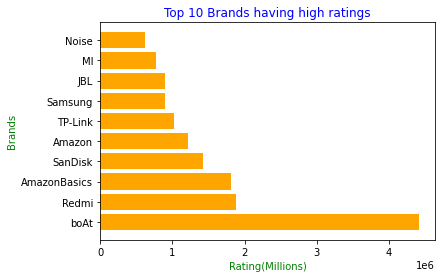

<Figure size 720x360 with 0 Axes>

In [21]:
plt.barh(df1.index, width = df1.rating_count , color = 'orange')
plt.title('Top 10 Brands having high ratings', color = 'b')
plt.xlabel('Rating(Millions)', color = 'green')
plt.ylabel('Brands', color = 'green')
plt.figure(figsize = (10,5))
plt.show()

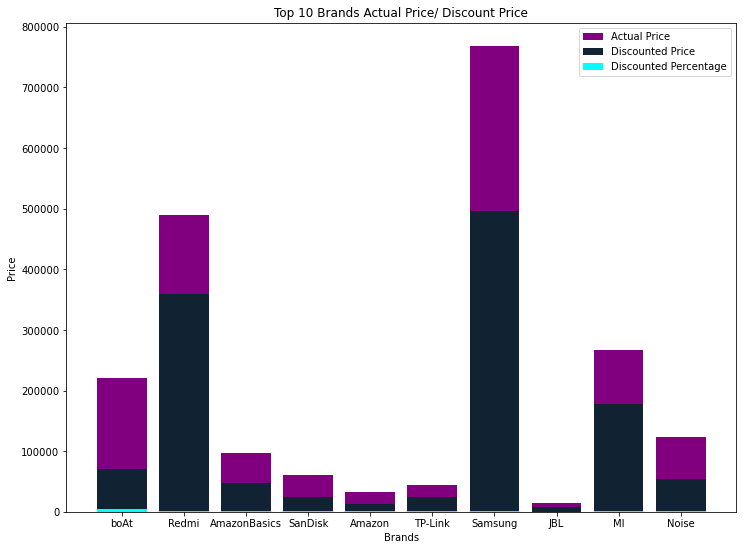

In [22]:
plt.figure(figsize = (12,9))
plt.bar(df1.index,df1['actual_price'], color = 'purple', label = 'Actual Price')
plt.bar(df1.index,df1['discounted_price'], color = '#112233', label = 'Discounted Price')
plt.bar(df1.index,df1['discount_percentage'], color = '#00FFFF', label = 'Discounted Percentage')
plt.title('Top 10 Brands Actual Price/ Discount Price')
plt.xlabel('Brands')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
df2 = df.groupby('category').count().sort_values('brand', ascending = False).head()
df2

,discounted_price,actual_price,discount_percentage,rating,rating_count,brand
category,,,,,,
Electronics,526,526,526,526,526,526
Computers&Accessories,453,453,453,453,453,453
Home&Kitchen,448,448,448,448,448,448
OfficeProducts,31,31,31,31,31,31
HomeImprovement,2,2,2,2,2,2


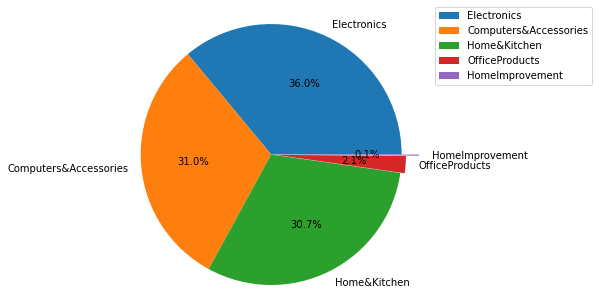

In [24]:
plt.pie(df2.brand, labels = df2.index, autopct = '%1.1f%%', explode = [0,0,0,0.05,0.2], radius = 1.5)
plt.legend(loc = 'right',bbox_to_anchor=(2, 0, 0, 2))
plt.show()

#### From the above analysis,
    1. Electronics is most sold product.
    2. Samsung is giving more discount.
    3. boAt has most ratings